## Using HR_Analytics data predicting the employee retention

The data set is from kaggle https://www.kaggle.com/giripujar/hr-analytics. The data set contains of HR employee data and the goal is to predict the employee retention using Logistic Regression.

1. Exploratory analysis to check which areas have direct impact on employee retention.
2. Plot bar chart on employee salaries on retention.
3. Plot bar charts showing correlation between departments on employee retention.
4. Build logistic regression model using variables narrowed down in step 1.
5. Measure the accuracy of the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Hasini\\Desktop\\DS_Infor\\Kaggle_Datasets\\HR_Analytics'

In [3]:
cd C:\Users\Hasini\Desktop\DS_Infor\Kaggle_Datasets\HR_Analytics

C:\Users\Hasini\Desktop\DS_Infor\Kaggle_Datasets\HR_Analytics


In [4]:
hr_df = pd.read_csv("HR_comma_sep.csv")

In [5]:
hr_df.shape

(14999, 10)

From the above results there is 14999 rows and 10 columns in the data set.

In [6]:
hr_df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [7]:
# column names
column_names = hr_df.loc[0]
print("Column Names\n --------------------------------\n",column_names)

Column Names
 --------------------------------
 satisfaction_level        0.38
last_evaluation           0.53
number_project               2
average_montly_hours       157
time_spend_company           3
Work_accident                0
left                         1
promotion_last_5years        0
Department               sales
salary                     low
Name: 0, dtype: object


In [8]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
#checking for null value columns
hr_df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### 1. Data Exploration and visualization

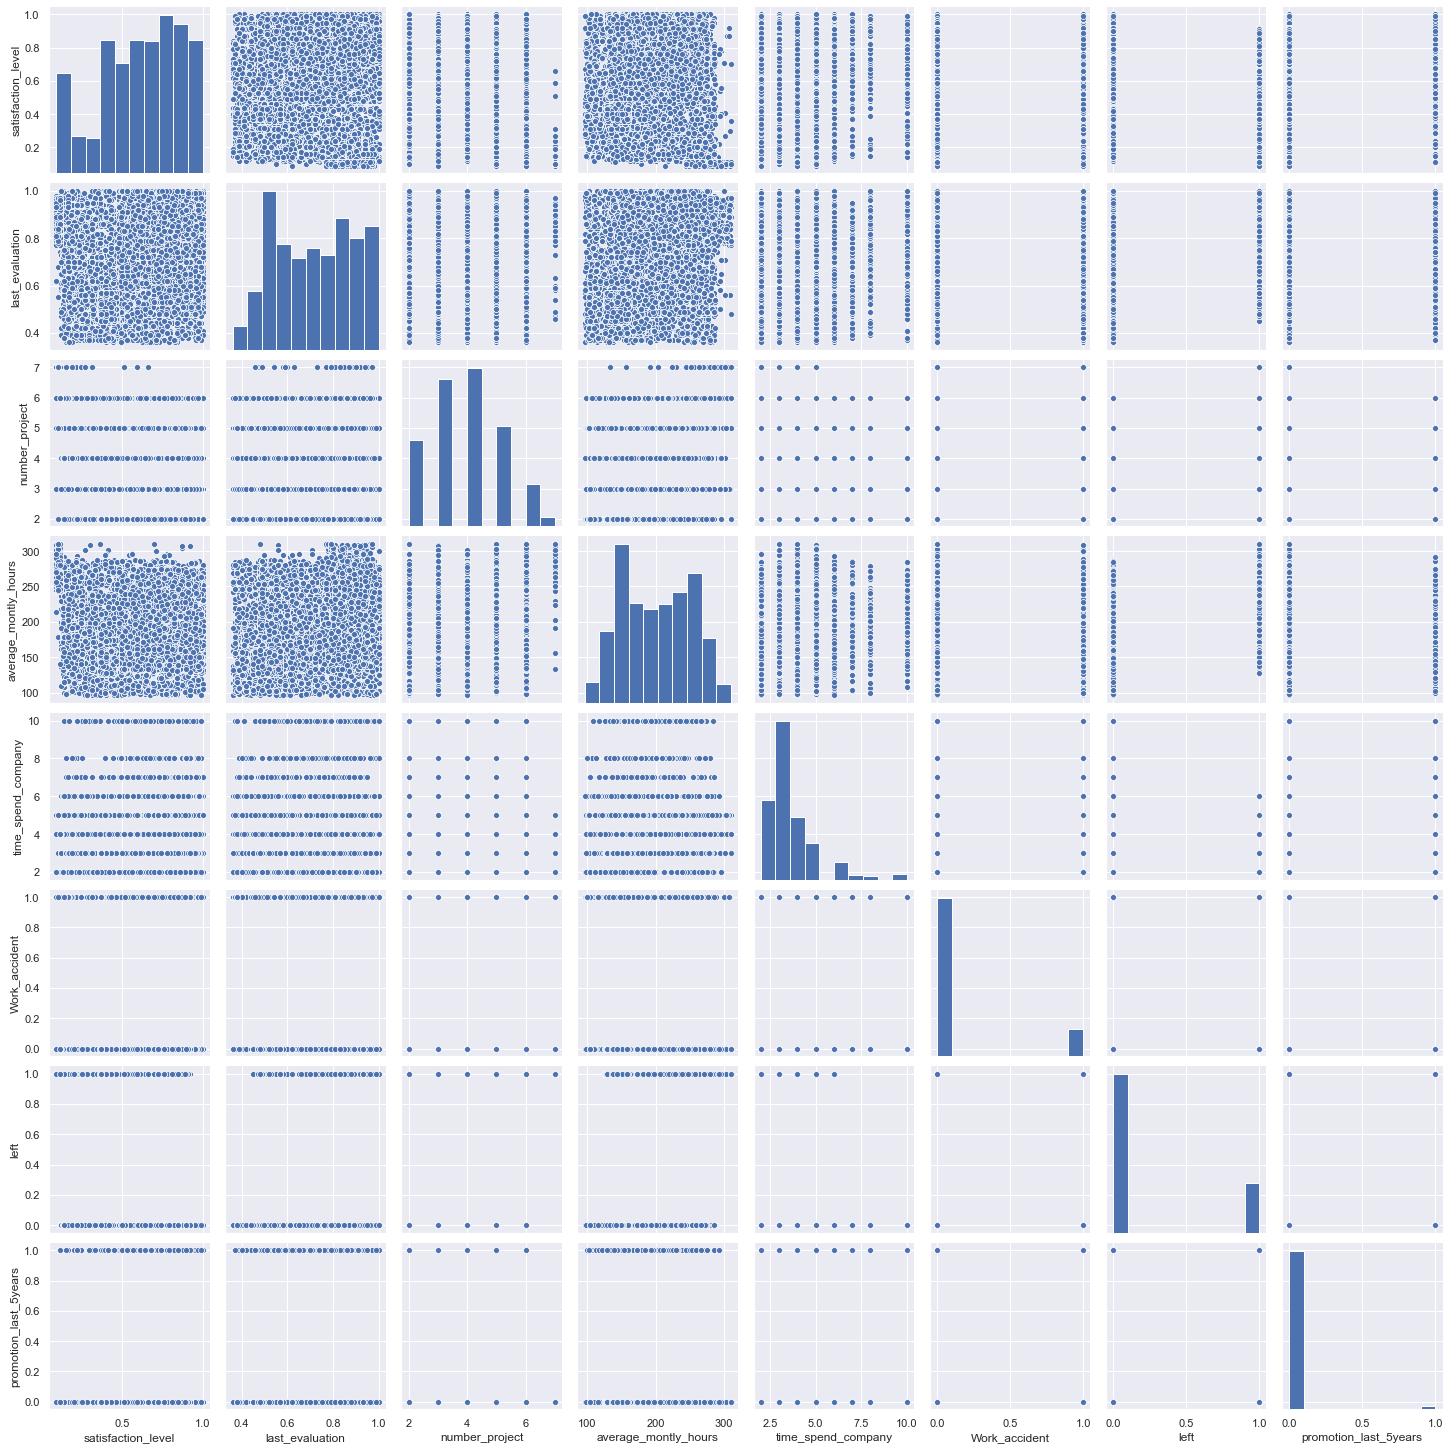

In [10]:
#to see the correlation between the columns
sns.set()
columns = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","left","promotion_last_5years"]
sns.pairplot(hr_df[columns], height = 2.5)
plt.show()

In [11]:
#Filter the dataframe by the employees left the company
left_df = hr_df[hr_df["left"]== 1]
left_df.shape

(3571, 10)

In [12]:
#filter the dataframe by the employees retained in the company
retained_df = hr_df[hr_df["left"] ==0]
retained_df.shape

(11428, 10)

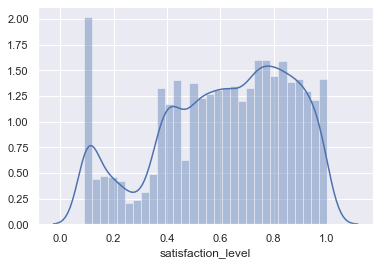

In [13]:
sns.distplot(hr_df["satisfaction_level"])

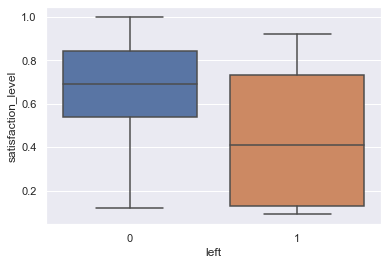

In [14]:
sns.boxplot(x="left", y = "satisfaction_level", data =hr_df)

From the above plot it is clear that employees left are less satisfied than employees retained.

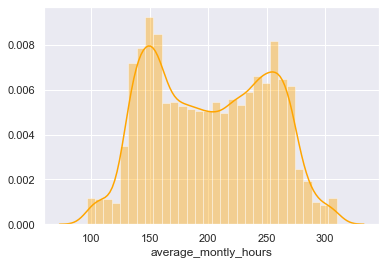

In [15]:
sns.distplot(hr_df["average_montly_hours"], color = "orange")

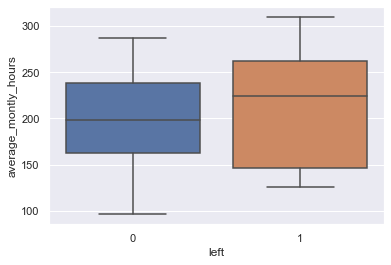

In [16]:
sns.boxplot(x = "left", y ="average_montly_hours", data = hr_df)

From the above plot it is clear that employees left has worked more average monthly hours than employees retained.

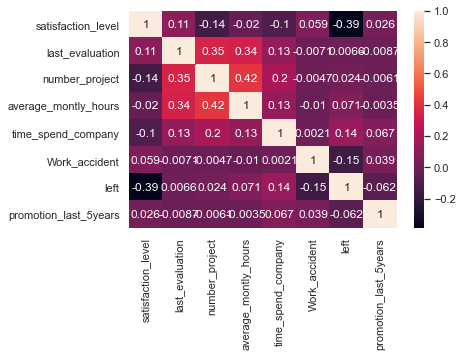

In [17]:
col_data = hr_df[["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","left","promotion_last_5years"]]
corr_data = col_data.corr()
sns.heatmap(corr_data, annot = True)

### Average percentage number for all columns

In [18]:
hr_df.groupby("left").mean()*100

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,66.680959,71.547340,378.666433,19906.020301,338.003150,17.500875,2.625131
1,44.009801,71.811257,385.550266,20741.921031,387.650518,4.732568,0.532064


From the above results below assumptions can be made,

1. Employees that left the company has less "satisfaction_level"(44%), compared to employees retained (66.68%).
2. Employees that left the company has less "promotion_last_5years" (0.53%) compared to employees retained (2.63%)
3. Employees that left the company worked slighlty more average monthly hours compared to employees retained.

### 2. Impact of employee retention on salary

Text(0.5, 0, 'Salary')

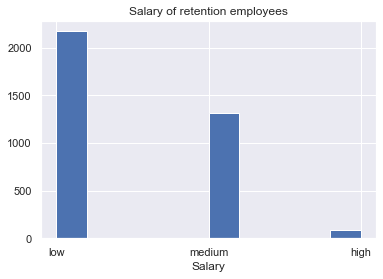

In [19]:
#Plot the histogram on employee who left the company on salaries.
left_df["salary"].hist()
plt.title("Salary of retention employees")
plt.xlabel("Salary")

from the above plot it is clear that most of the employees left has been recieving low salaries. Very few employees with high salaries have left.

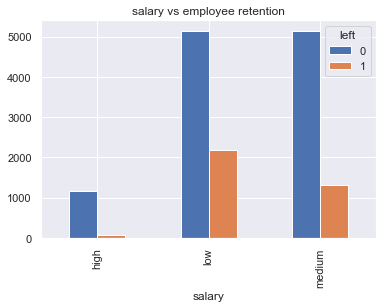

In [20]:
#Plot the bar chart on employee retention on salaries.
pd.crosstab(hr_df.salary, hr_df.left).plot(kind = "bar")
plt.title("salary vs employee retention")
plt.show()

### 3. Impact of employee retention on Department

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

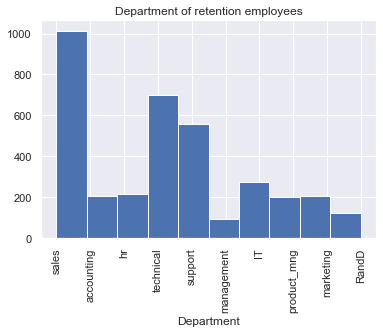

In [21]:
#Plot the Histogrm on employee who left on Department.
left_df["Department"].hist()
plt.title("Department of retention employees")
plt.xlabel("Department")
plt.xticks(rotation = 90)

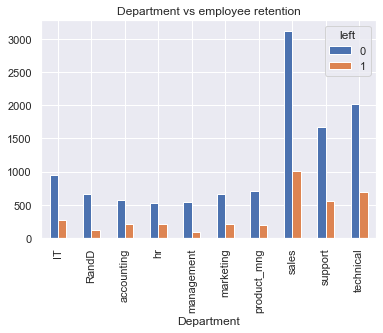

In [22]:
#Plot the bar chart on employee retention on salaries.
pd.crosstab(hr_df.Department,hr_df.left).plot(kind = "bar")
plt.title("Department vs employee retention")
plt.show()

From the department data it is clear that the highest 3 departments for emloyees left are sales, technical and support in order, but from the over all data, Department doesnt show a significant difference hence will leave it out of analysis.

from the above analysis I have narrowed down the columns for logistic regresion calculations.
1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary

In [23]:
#filter the selected columnsin dataframe
df_log = hr_df[["left","salary", "satisfaction_level", "average_montly_hours","promotion_last_5years"]]

Since salary is text data we will be using dummy variables to convert it to numbers

In [24]:
#Using dummy variables.
salary_dummy = pd.get_dummies(df_log.salary, prefix = "salary")
salary_dummy.head(5)

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [25]:
df_dummy = pd.concat([salary_dummy,df_log], axis = 1)
df_dummy.head(5)

,salary_high,salary_low,salary_medium,left,salary,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,1,low,0.38,157,0
1,0,0,1,1,medium,0.80,262,0
2,0,0,1,1,medium,0.11,272,0
3,0,1,0,1,low,0.72,223,0
4,0,1,0,1,low,0.37,159,0


In [26]:
#Droping the converted columns and the salary column.
df_dummy.drop(["salary","left"], axis = 1, inplace = True)

In [27]:
X = df_dummy
X.head(5)

,salary_high,salary_low,salary_medium,satisfaction_level,average_montly_hours,promotion_last_5years
0,0,1,0,0.38,157,0
1,0,0,1,0.80,262,0
2,0,0,1,0.11,272,0
3,0,1,0,0.72,223,0
4,0,1,0,0.37,159,0


In [28]:
y = hr_df.left
y.head(3)

0    1
1    1
2    1
Name: left, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

### 4. Build logistic regression model using variables narrowed down.

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 5. Measure the accuracy of the model

In [34]:
model.score(X_test, y_test)

0.7784444444444445

### Conclusion

Logistic Regression was used to predict the employee retention. From the above results the accuracy of the model is 0.78. Using model.predict any data can be predicted whether the employee will retain in the company or leave.